In [3]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import me_data_fcts as df

# Population = 100

In [2]:
exp_folder = "/home/leni/are-logs/mnipes/"


In [3]:
parent_fits = []
for sync in os.listdir(exp_folder):
    for target in os.listdir(exp_folder + "/" + sync):
        for replicate in os.listdir(exp_folder + "/" + sync + "/" + target):
            folder = exp_folder + "/" + sync + "/" + target + "/" + replicate
            print(folder)
            parent_ids = df.load_parent_pool(folder + "/genomes_pool.csv")
            ids, parents, fitnesses,evals, deltas = df.load_fitness(folder + "/fitnesses.csv")
            
            fits = [[i,p[0],p[1],f,e,d,sync,target,replicate] for i, p, e, d, f in zip(ids,parents,evals,deltas,fitnesses)]
            eval_times = df.load_comp_time(folder +"/times.csv")
            fits = df.add_comp_time(fits,eval_times)
            parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","parent 1","parent 2","fitness","number of evaluations","learning delta","synchronicity","target delta","replicate","computational time","wall time","discretised time"])


/home/leni/are-logs/mnipes//sync/target_4/mnipes2_16_1_15-12-41-1335-2026698784
/home/leni/are-logs/mnipes//sync/target_4/mnipes2_20_1_0-56-10-599-3680641556
/home/leni/are-logs/mnipes//sync/target_4/mnipes2_20_1_3-41-37-7961-2321178279
/home/leni/are-logs/mnipes//sync/no_target/mnipes2_20_1_4-55-12-2042-467855710
/home/leni/are-logs/mnipes//sync/no_target/mnipes2_16_1_15-11-54-4083-39461721
/home/leni/are-logs/mnipes//sync/no_target/mnipes2_20_1_5-1-45-5493-2983899542
/home/leni/are-logs/mnipes//sync/target_8/mnipes2_19_1_11-13-2-2704-258224514
/home/leni/are-logs/mnipes//sync/target_8/mnipes2_16_1_15-12-58-8397-97627319
/home/leni/are-logs/mnipes//sync/target_8/mnipes2_19_1_11-13-1-1828-531447350
/home/leni/are-logs/mnipes//sync/target_6/mnipes2_16_1_15-12-51-1387-3880451573
/home/leni/are-logs/mnipes//sync/target_6/mnipes2_19_1_23-31-32-2798-2032189678
/home/leni/are-logs/mnipes//sync/target_6/mnipes2_19_1_11-24-52-2509-3959161847
/home/leni/are-logs/mnipes//asyn/target_4/mnipes2_19

In [4]:
print(par_fit_data)

         iteration  robot index  parent 1  parent 2   fitness  \
0                0          177        -1        -1  0.109375   
1                0           88        -1        -1  0.015625   
2                0           84        -1        -1  0.015625   
3                0           67        -1        -1  0.031250   
4                0           73        -1        -1  0.015625   
...            ...          ...       ...       ...       ...   
1019595        906         2637      2343      2357  0.203125   
1019596        906         2657      1944      1818  0.203125   
1019597        906         2669      1714      2008  0.203125   
1019598        906         2663      1985      1089  0.203125   
1019599        906         2675      2048      2343  0.203125   

         number of evaluations  learning delta synchronicity target delta  \
0                           40        0.062500          sync     target_4   
1                          230        0.000000          sync     

## Fitnesses

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

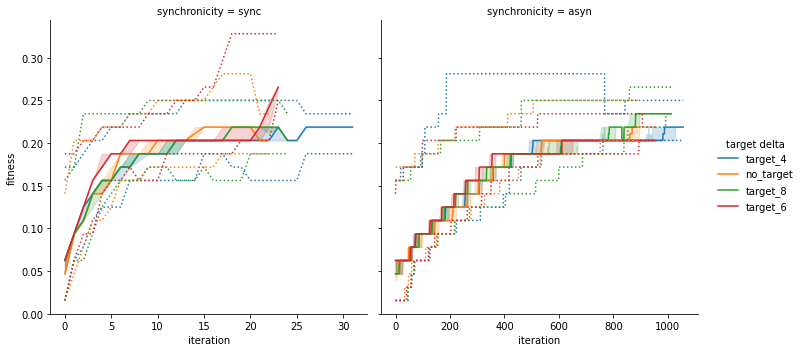

In [9]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")
#sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.max,ci=None,color='b')
#sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.min,ci=None,color='b')

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

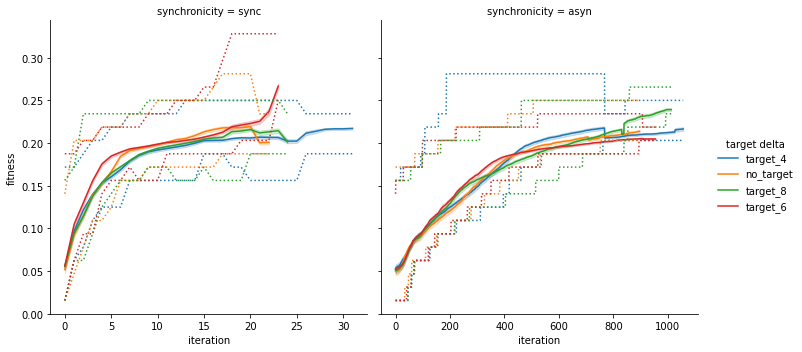

In [14]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

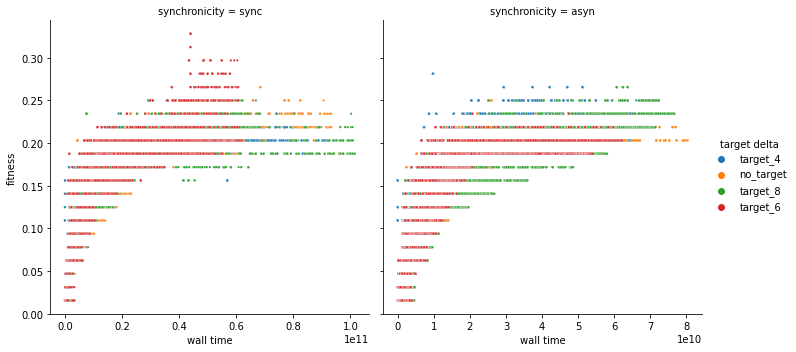

In [10]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="scatter",x="wall time",y="fitness",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False},s=5)

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

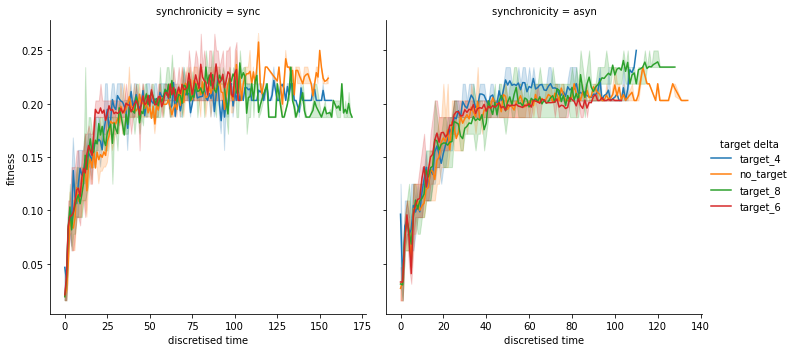

In [5]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="fitness",hue="target delta",col="synchronicity",estimator="mean",errorbar=("pi",50),facet_kws={"sharex": False})

## Learning Delta

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

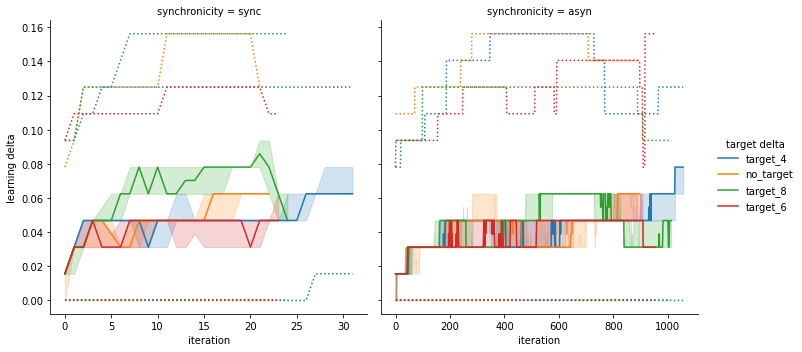

In [10]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="learning delta",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

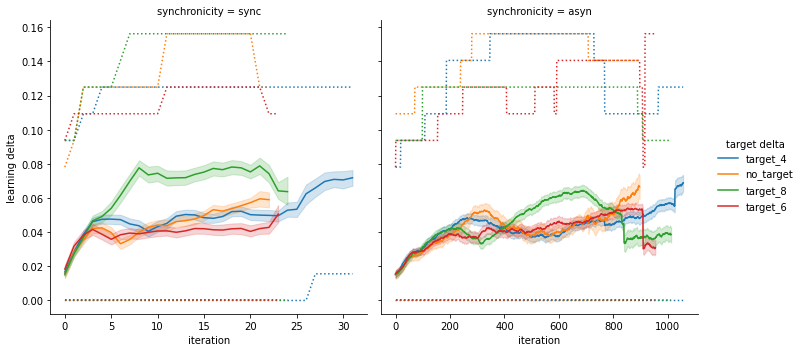

In [13]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="learning delta",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="min")

## Number of evaluations and Computational Time

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

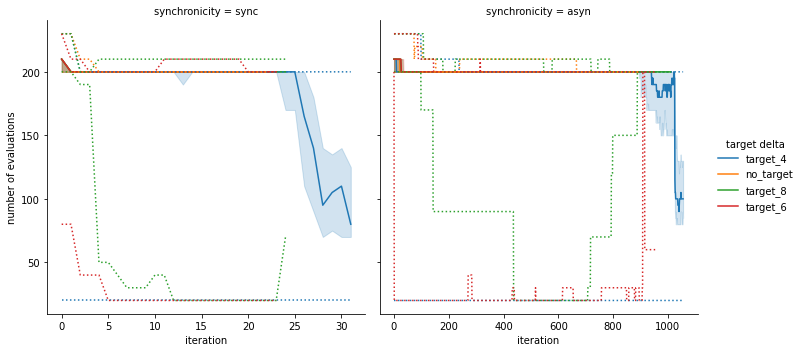

In [11]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="number of evaluations",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

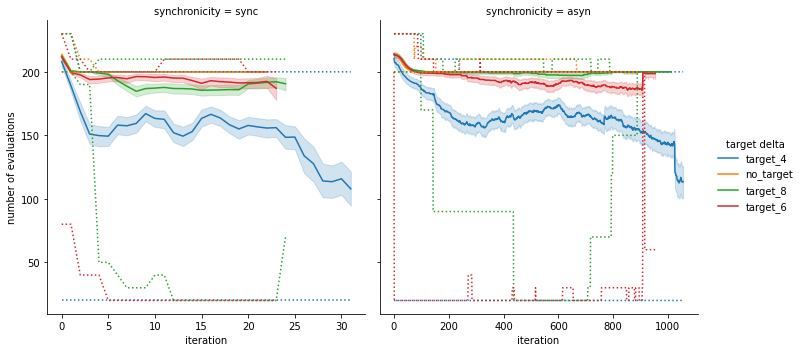

In [12]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="number of evaluations",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

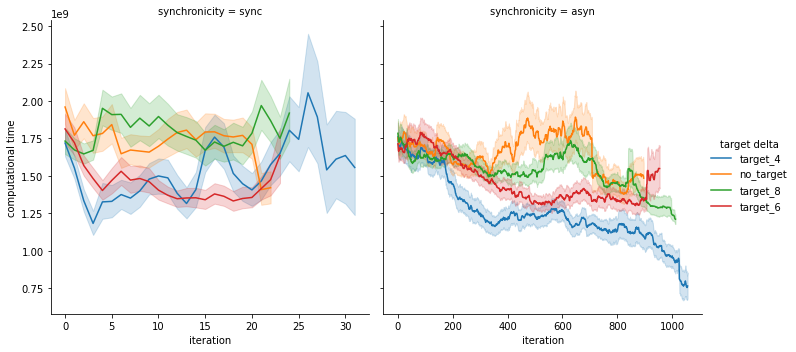

In [14]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="computational time",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
#g.map_dataframe(sns.lineplot,x="iteration",y="computational time",ci=None,hue="target delta",linestyle=":",estimator="max")
#g.map_dataframe(sns.lineplot,x="iteration",y="computational time",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

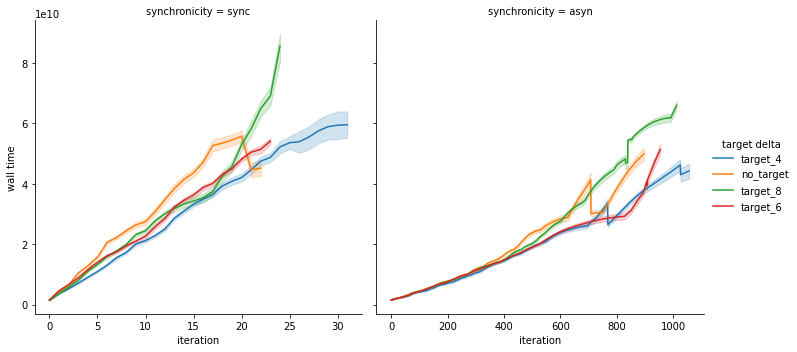

In [9]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="wall time",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})

# Population = 50

In [2]:
exp_folder = "/home/leni/are-logs/mnipes_explo/"

In [3]:
parent_fits = []
for sync in os.listdir(exp_folder):
    for target in os.listdir(exp_folder + "/" + sync):
        for replicate in os.listdir(exp_folder + "/" + sync + "/" + target):
            folder = exp_folder + "/" + sync + "/" + target + "/" + replicate
            print(folder)
            parent_ids = df.load_parent_pool(folder + "/genomes_pool.csv")
            ids, parents, fitnesses,evals, deltas = df.load_fitness(folder + "/fitnesses.csv")
            
            fits = [[i,p[0],p[1],f,e,d,sync,target,replicate] for i, p, e, d, f in zip(ids,parents,evals,deltas,fitnesses)]
            eval_times = df.load_comp_time(folder +"/times.csv")
            fits = df.add_comp_time(fits,eval_times)
            parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","parent 1","parent 2","fitness","number of evaluations","learning delta","synchronicity","target delta","replicate","computational time","wall time","discretised time"])


/home/leni/are-logs/mnipes_explo//asyn/target_2/mnipes2_4_2_14-34-45-5801-462096686
/home/leni/are-logs/mnipes_explo//asyn/target_2/mnipes2_4_2_14-34-42-2832-1873397715
/home/leni/are-logs/mnipes_explo//asyn/target_2/mnipes2_4_2_14-34-39-9788-4178608970
/home/leni/are-logs/mnipes_explo//asyn/target_4/mnipes2_4_2_16-35-16-6700-727452125
/home/leni/are-logs/mnipes_explo//asyn/target_4/mnipes2_4_2_15-15-36-6842-1846758287
/home/leni/are-logs/mnipes_explo//asyn/target_4/mnipes2_4_2_16-35-16-6700-3391351332
/home/leni/are-logs/mnipes_explo//asyn/no_target/mnipes2_4_2_14-34-10-800-1344980658
/home/leni/are-logs/mnipes_explo//asyn/no_target/mnipes2_4_2_14-34-7-7786-4032119941
/home/leni/are-logs/mnipes_explo//asyn/target_6/mnipes2_6_2_20-40-52-2624-4090849152
/home/leni/are-logs/mnipes_explo//asyn/target_6/mnipes2_6_2_21-54-53-3880-426249805
/home/leni/are-logs/mnipes_explo//asyn/target_6/mnipes2_6_2_22-52-26-6177-2356151279
/home/leni/are-logs/mnipes_explo//sync/target_2/mnipes2_9_2_2-28-59-

In [4]:
print(par_fit_data)

        iteration  robot index  parent 1  parent 2   fitness  \
0               0           90        -1        -1  0.156250   
1               0           23        -1        -1  0.046875   
2               0          115        -1        -1  0.109375   
3               0           85        -1        -1  0.078125   
4               0           75        -1        -1  0.062500   
...           ...          ...       ...       ...       ...   
326195         50         2864      2253      2401  0.281250   
326196         50         2849      2592      2832  0.281250   
326197         50         2847      2253      2771  0.281250   
326198         50         2861      2090      2479  0.281250   
326199         50         2851      2542      2802  0.281250   

        number of evaluations  learning delta synchronicity target delta  \
0                          20        0.031250          asyn     target_2   
1                          70        0.031250          asyn     target_2   
2  

## Fitnesses

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

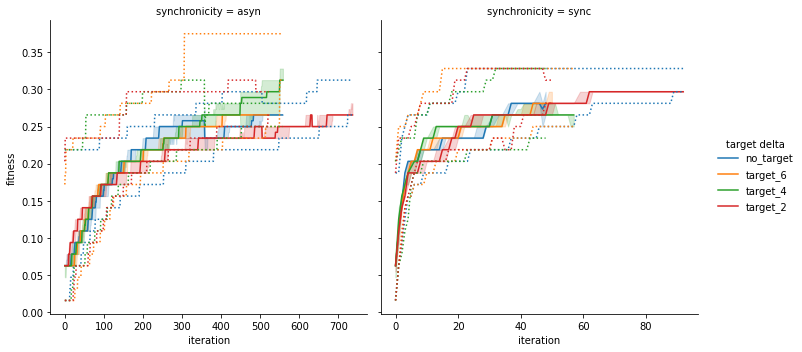

In [9]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False},hue_order=["no_target","target_6","target_4","target_2"])
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

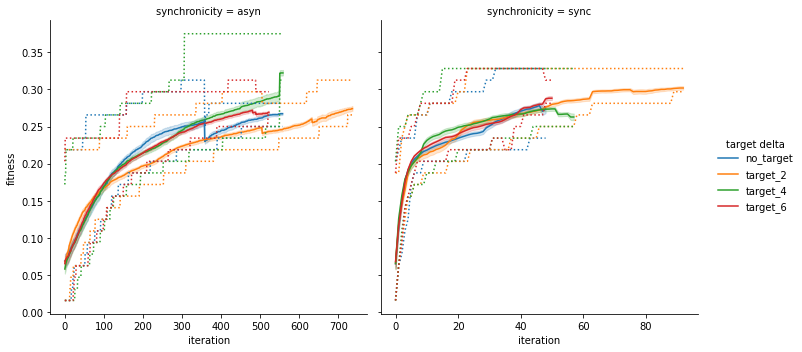

In [18]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False},hue_order=["no_target","target_6","target_4","target_2"])
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

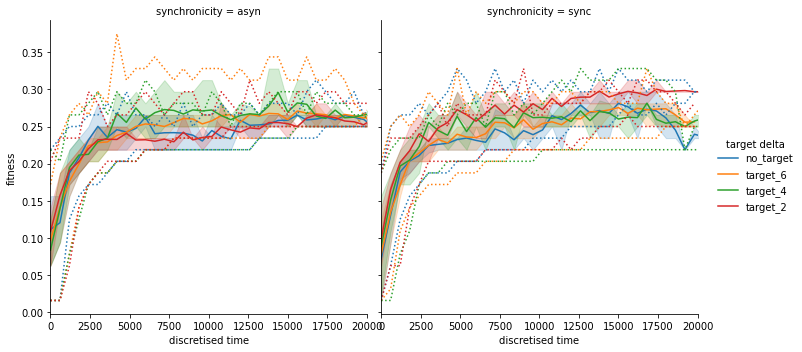

In [8]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="fitness",hue="target delta",col="synchronicity",estimator="mean",errorbar=("pi",50),hue_order=["no_target","target_6","target_4","target_2"])
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")
g.set(xlim=[0,20000])

## Learning Delta

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

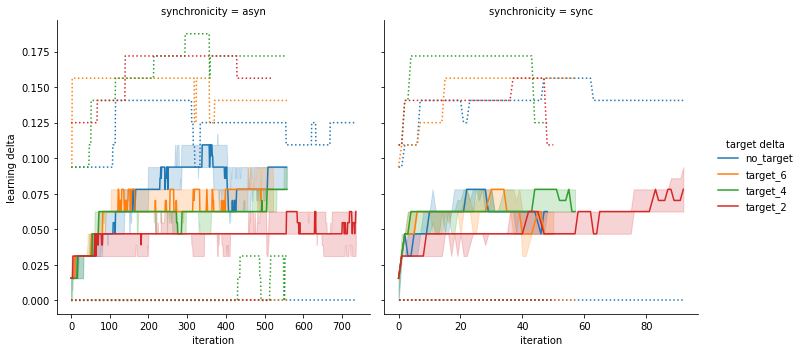

In [11]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="learning delta",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False},hue_order=["no_target","target_6","target_4","target_2"])
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

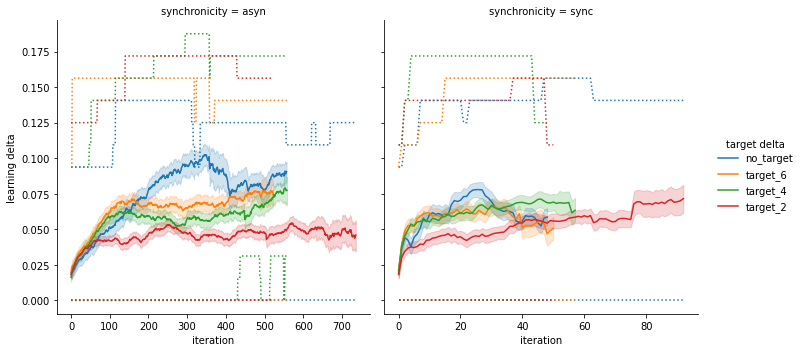

In [12]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="learning delta",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False},hue_order=["no_target","target_6","target_4","target_2"])
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

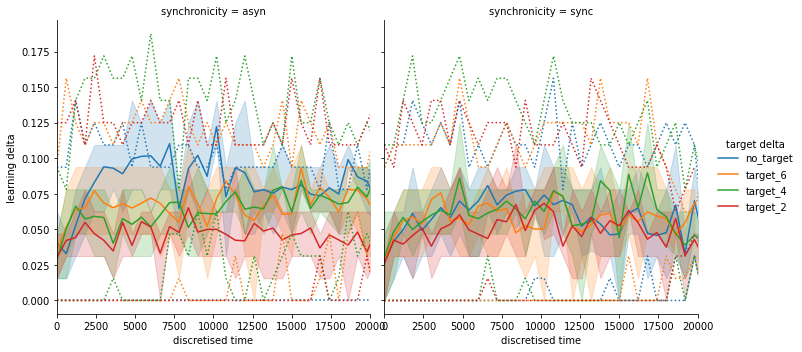

In [13]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="learning delta",hue="target delta",col="synchronicity",estimator="mean",errorbar=("pi",50),hue_order=["no_target","target_6","target_4","target_2"])
g.map_dataframe(sns.lineplot,x="discretised time",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="discretised time",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="min")
g.set(xlim=[0,20000])

## Number of Evaluations and Computational Time

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

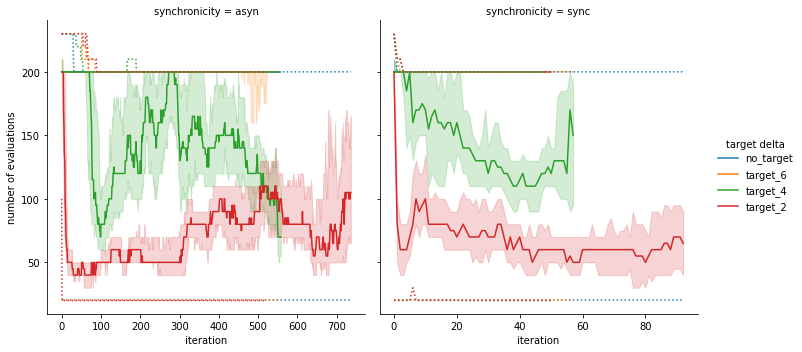

In [14]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="number of evaluations",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False},hue_order=["no_target","target_6","target_4","target_2"])
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

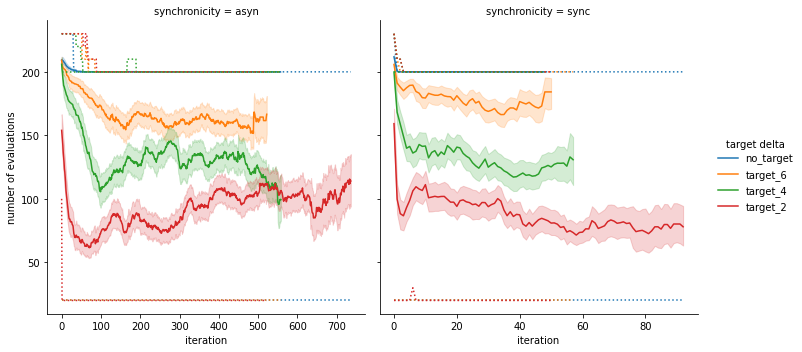

In [15]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="number of evaluations",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False},hue_order=["no_target","target_6","target_4","target_2"])
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

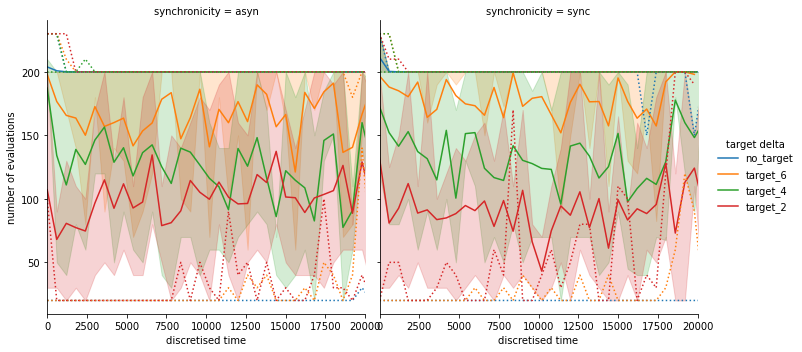

In [16]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="number of evaluations",hue="target delta",col="synchronicity",estimator="mean",errorbar=("pi",50),hue_order=["no_target","target_6","target_4","target_2"])
g.map_dataframe(sns.lineplot,x="discretised time",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="discretised time",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="min")
g.set(xlim=[0,20000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

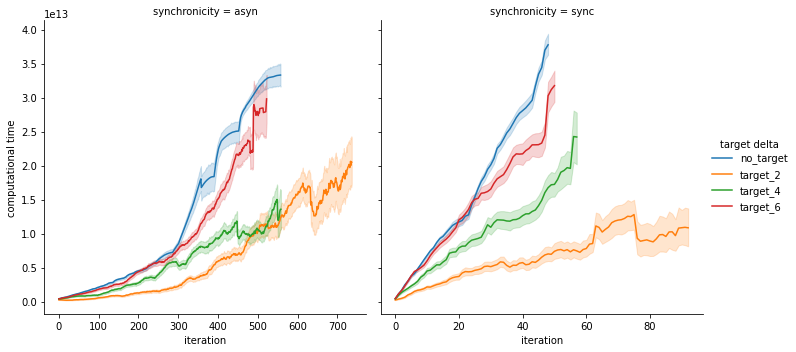

In [24]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="computational time",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
#g.map_dataframe(sns.lineplot,x="iteration",y="computational time",ci=None,hue="target delta",linestyle=":",estimator="max")
#g.map_dataframe(sns.lineplot,x="iteration",y="computational time",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

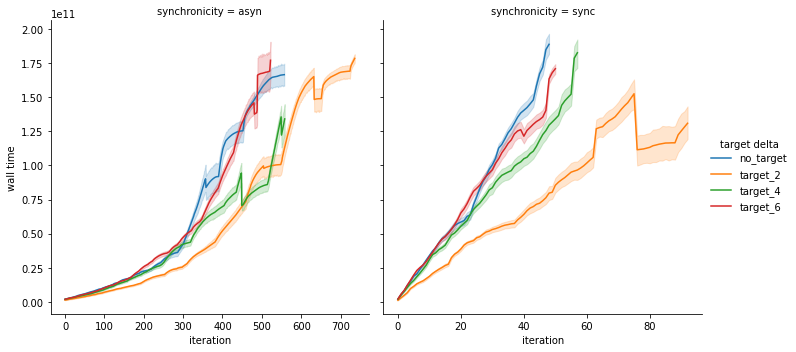

In [25]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="wall time",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})

# Task - Locomotion

In [1]:
exp_folder = "/home/leni/are-logs/locomotion/"

In [4]:
parent_fits = []
for sync in os.listdir(exp_folder):
    for target in os.listdir(exp_folder + "/" + sync):
        for replicate in os.listdir(exp_folder + "/" + sync + "/" + target):
            folder = exp_folder + "/" + sync + "/" + target + "/" + replicate
            print(folder)
            parent_ids = df.load_parent_pool(folder + "/genomes_pool.csv")
            ids, parents, fitnesses,evals, deltas = df.load_fitness(folder + "/fitnesses.csv")
            
            fits = [[i,p[0],p[1],f,e,d,sync,target,replicate] for i, p, e, d, f in zip(ids,parents,evals,deltas,fitnesses)]
            eval_times = df.load_comp_time(folder +"/times.csv")
            fits = df.add_comp_time(fits,eval_times)
            parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","number of new designs","parent 1","parent 2","fitness","number of evaluations","learning delta","synchronicity","target delta","replicate","computational time","wall time","discretised time"])


FileNotFoundError: [Errno 2] No such file or directory: '/home/leni/are-logs/locomotion/'

## Fitnesses

In [8]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False},hue_order=["no_target","target_15","target_10","target_05"])
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")

In [ ]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="fitness",hue="target delta",col="synchronicity",estimator="mean",errorbar=("pi",50),hue_order=["no_target","target_15","target_10","target_05"])
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")
g.set(xlim=[0,20000])

# Locomotion: Archive vs no archive

In [3]:
exp_folder = "/home/leni/are-logs/locomotion2/locomotion/"

In [13]:
parent_fits = []
for sync in os.listdir(exp_folder):
    for target in os.listdir(exp_folder + "/" + sync):
        for arch in os.listdir(exp_folder + "/" + sync + "/" + target):
            for replicate in os.listdir(exp_folder + "/" + sync + "/" + target + "/" + arch):
                folder = exp_folder + "/" + sync + "/" + target + "/" + arch + "/" + replicate
                print(folder)
                parent_ids = df.load_parent_pool(folder + "/genomes_pool.csv")
                ids, parents, fitnesses,evals, deltas = df.load_fitness(folder + "/fitnesses.csv")
            
                fits = [[i,p[0],p[1],f,e,d,sync,target,arch,replicate] for i, p, e, d, f in zip(ids,parents,evals,deltas,fitnesses)]
                eval_times = df.load_comp_time(folder +"/times.csv")
                fits = df.add_comp_time(fits,eval_times)
                parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","number of new designs","parent 1","parent 2","fitness","number of evaluations","learning delta","synchronicity","target delta","controller archive","replicate","computational time","wall time","discretised time"])


/home/leni/are-logs/locomotion2/locomotion//asyn/target_15/with_archive/mnipes2_19_2_10-46-56-6231-174074352
/home/leni/are-logs/locomotion2/locomotion//asyn/target_15/with_archive/mnipes2_30_2_20-14-56-6932-30268135
/home/leni/are-logs/locomotion2/locomotion//asyn/target_15/with_archive/mnipes2_30_2_10-27-27-7957-2459161362
/home/leni/are-logs/locomotion2/locomotion//asyn/target_15/with_archive/mnipes2_30_2_19-1-52-2812-2633785176
/home/leni/are-logs/locomotion2/locomotion//asyn/target_15/with_archive/mnipes2_19_2_10-47-0-207-2166183424
/home/leni/are-logs/locomotion2/locomotion//asyn/target_15/with_archive/mnipes2_30_2_11-17-42-2821-1999047339
/home/leni/are-logs/locomotion2/locomotion//asyn/target_15/no_archive/mnipes2_29_2_8-15-24-4188-3220119304
/home/leni/are-logs/locomotion2/locomotion//asyn/target_15/no_archive/mnipes2_29_2_6-12-18-8759-2189983395
/home/leni/are-logs/locomotion2/locomotion//asyn/target_15/no_archive/mnipes2_29_2_23-40-6-6583-3872106846
/home/leni/are-logs/locom

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/si

<Figure size 2880x2880 with 0 Axes>

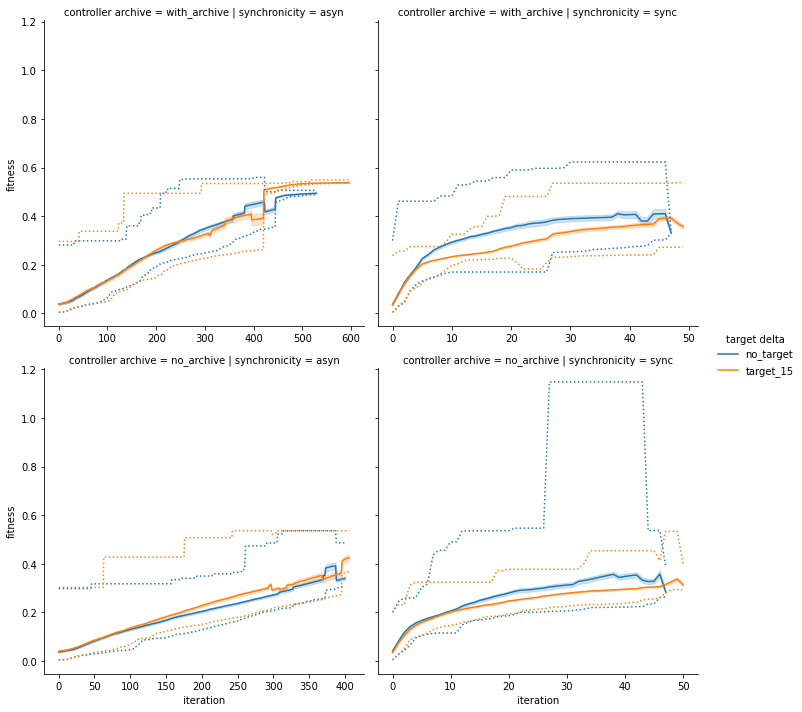

In [14]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",row="controller archive",estimator="mean",facet_kws={"sharex": False},hue_order=["no_target","target_15"])
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max",hue_order=["no_target","target_15"])
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min",hue_order=["no_target","target_15"])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/si

<Figure size 2880x2880 with 0 Axes>

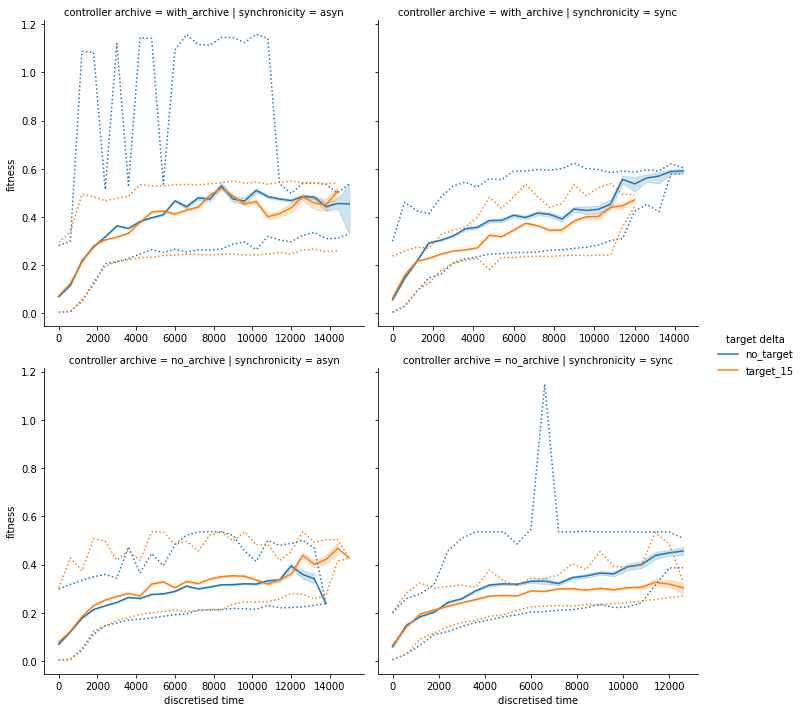

In [8]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="fitness",hue="target delta",col="synchronicity",row="controller archive",estimator="mean",facet_kws={"sharex": False},hue_order=["no_target","target_15"])
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max",hue_order=["no_target","target_15"])
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min",hue_order=["no_target","target_15"])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/si

<Figure size 2880x2880 with 0 Axes>

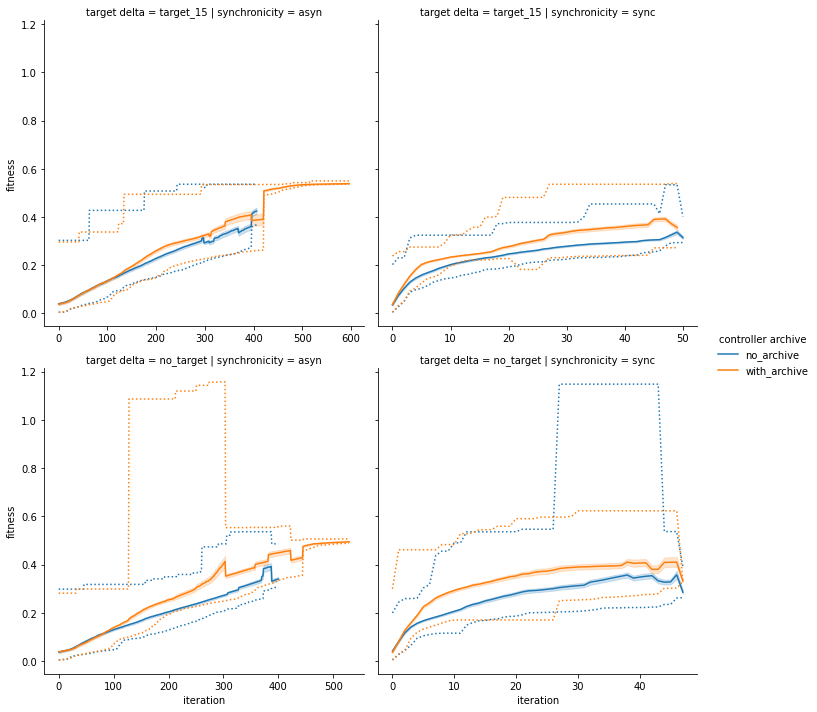

In [9]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="controller archive",col="synchronicity",row="target delta",estimator="mean",facet_kws={"sharex": False},hue_order=["no_archive","with_archive"])
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="controller archive",linestyle=":",estimator="max",hue_order=["no_archive","with_archive"])
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="controller archive",linestyle=":",estimator="min",hue_order=["no_archive","with_archive"])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/si

<Figure size 2880x2880 with 0 Axes>

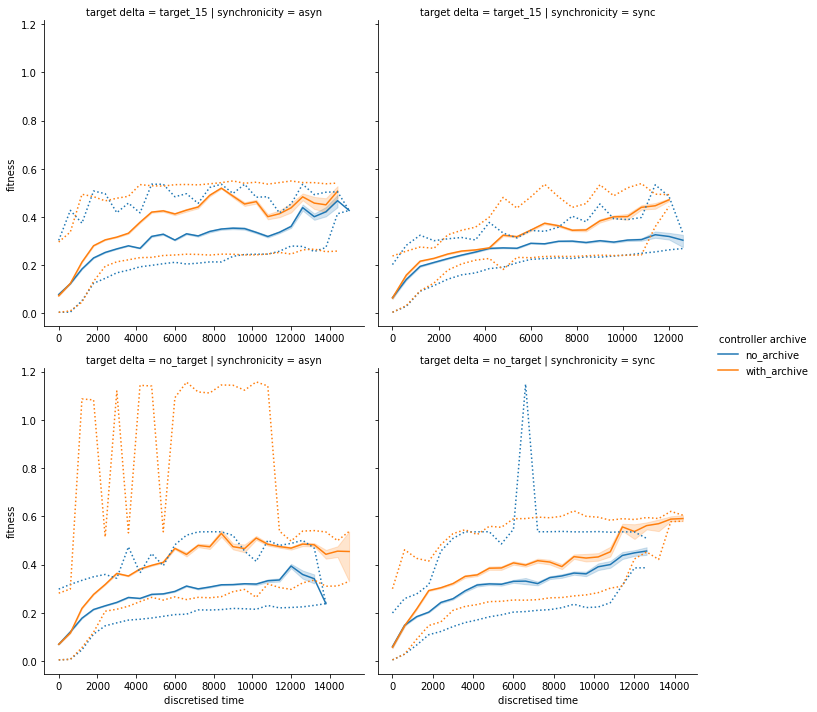

In [10]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="fitness",hue="controller archive",col="synchronicity",row="target delta",estimator="mean",facet_kws={"sharex": False},hue_order=["no_archive","with_archive"])
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="controller archive",linestyle=":",estimator="max",hue_order=["no_archive","with_archive"])
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="controller archive",linestyle=":",estimator="min",hue_order=["no_archive","with_archive"])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/si

<Figure size 2880x2880 with 0 Axes>

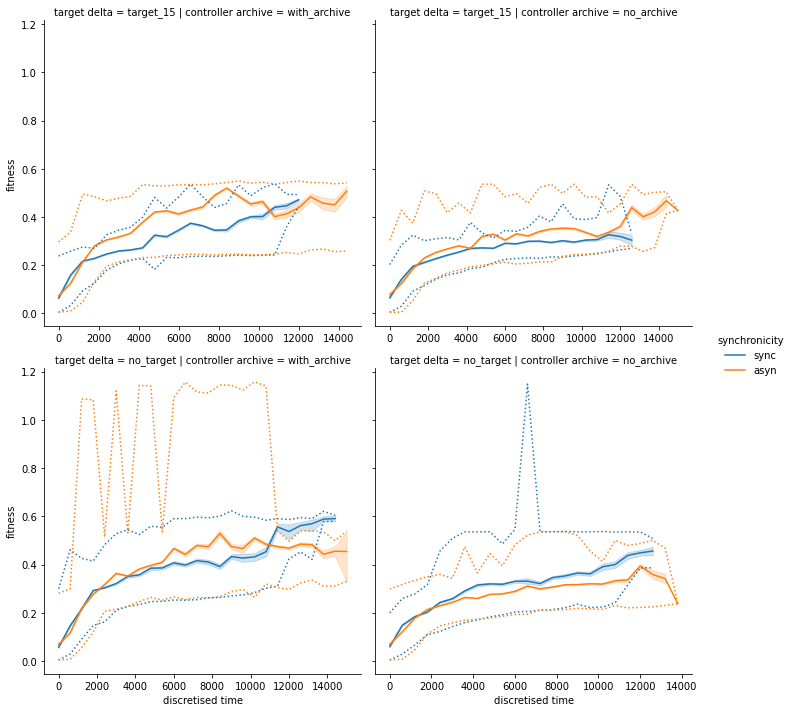

In [11]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="fitness",hue="synchronicity",col="controller archive",row="target delta",estimator="mean",facet_kws={"sharex": False},hue_order=["sync","asyn"])
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="synchronicity",linestyle=":",estimator="max",hue_order=["sync","asyn"])
g.map_dataframe(sns.lineplot,x="discretised time",y="fitness",ci=None,hue="synchronicity",linestyle=":",estimator="min",hue_order=["sync","asyn"])